loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Custom COCO categories: 
obj_1 obj_2

Custom COCO supercategories: 
particles


0

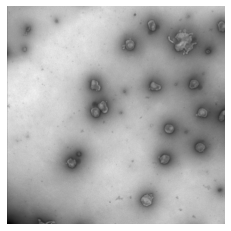

In [3]:
# %matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab


image_directory = './data/MuLV/gray/'
annotation_file = './data/MuLV/Vironova_Cell_Seg_2021.json'
example_coco = COCO(annotation_file)


categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))



category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]


# image_data

# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd='crowd')
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)